# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Given a list of features of jobs, predict their salary

In [81]:
#import your libraries
import pandas as pd
import sklearn 
import matplotlib as plt
import seaborn as sns
import numpy as np
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

import xgboost

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
#from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

#your info here
__author__ = "Ben Lewis"
__email__ = "benlewisdatascience@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [5]:
#load the data into a Pandas dataframe
df_train_features = pd.read_csv('data/train_features.csv')
df_train_salaries = pd.read_csv('data/train_salaries.csv')

In [6]:

df_test_features = pd.read_csv('data/test_features.csv')
#df_test_salaries = pd.read_csv('data/test_salaries.csv')

In [7]:
df_train_features.isnull() 

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [8]:
df_train_features.duplicated().sum()

0

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
len(df_train_features)

1000000

In [10]:
df_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [11]:
df_train = df_train_features.merge(df_train_salaries, on = 'jobId')

In [12]:
df_train_salaries = df_train_salaries[df_train['salary'] != 0]

In [13]:
df_train_features = df_train_features[df_train['salary'] != 0]

In [14]:
df_train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 3 Clean the data ----

In [22]:
df_train.groupby('companyId').mean()

,yearsExperience,milesFromMetropolis,salary
companyId,,,
COMP0,12.075195,49.842206,115.963615
COMP1,11.902212,49.392225,116.048609
COMP10,11.878245,49.465774,116.019800
COMP11,12.021673,49.688697,116.113029
COMP12,12.041310,49.790788,116.086485
COMP13,12.101968,49.674417,116.561795
COMP14,12.053307,49.335617,116.303495
COMP15,11.923149,49.786114,115.847117
COMP16,11.980929,49.267947,116.358424


In [15]:
df_train.groupby('major').mean()

,yearsExperience,milesFromMetropolis,salary
major,,,
BIOLOGY,11.991213,49.524487,127.932664
BUSINESS,12.011244,49.630251,135.648980
CHEMISTRY,11.975185,49.553104,129.072085
COMPSCI,11.979086,49.676099,132.075605
ENGINEERING,11.987832,49.576524,138.436617
LITERATURE,12.010991,49.694363,124.423097
MATH,11.992249,49.422311,133.319735
NONE,11.993119,49.485332,102.583479
PHYSICS,11.984626,49.554956,130.372436


In [16]:
df_train.groupby('jobType').mean()

,yearsExperience,milesFromMetropolis,salary
jobType,,,
CEO,11.998269,49.478458,145.311425
CFO,11.990440,49.572715,135.458547
CTO,12.010812,49.580930,135.479983
JANITOR,11.969657,49.443815,70.813045
JUNIOR,11.992287,49.659968,95.331557
MANAGER,11.987332,49.498006,115.367596
SENIOR,11.996624,49.572558,105.487775
VICE_PRESIDENT,11.993628,49.428059,125.367629


In [18]:
education = df_train.groupby('degree').mean().sort_values(by  = 'salary', ascending = False)
education

,yearsExperience,milesFromMetropolis,salary
degree,,,
DOCTORAL,12.003307,49.608529,135.489433
MASTERS,11.984935,49.553947,130.504903
BACHELORS,11.986045,49.589646,125.454663
HIGH_SCHOOL,11.995493,49.459355,101.920654
NONE,11.991404,49.477497,98.176467


In [19]:
education['salary']

degree
DOCTORAL       135.489433
MASTERS        130.504903
BACHELORS      125.454663
HIGH_SCHOOL    101.920654
NONE            98.176467
Name: salary, dtype: float64

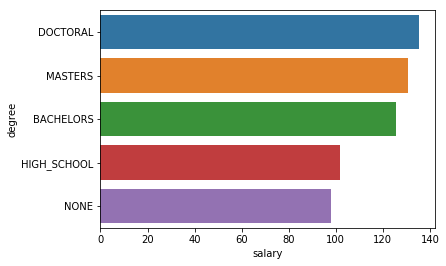

In [20]:
sns.barplot(x = education['salary'], y = education.index) 

In [21]:
jobType = df_train.groupby('jobType').mean().sort_values(by = 'salary', ascending = False)

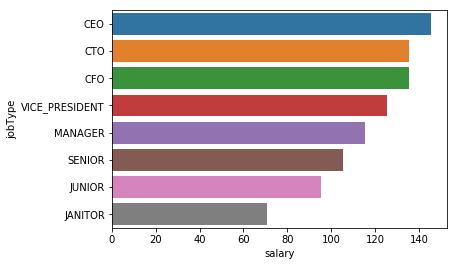

In [22]:
sns.barplot( y =jobType.index, x =   jobType['salary'])

In [ ]:
 = 

In [23]:
major = df_train.groupby('major').mean().sort_values(by = 'salary', ascending = False)

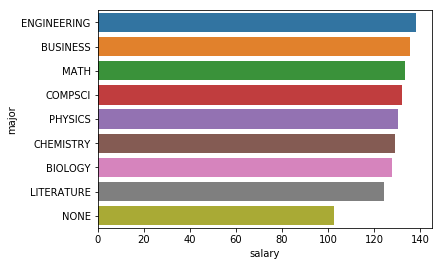

In [24]:
sns.barplot( y =major.index, x =   major['salary'])

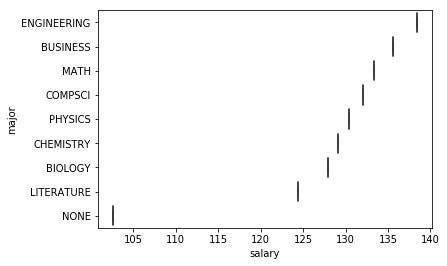

In [25]:
sns.boxplot(y = major.index, x = major['salary'])

In [26]:
industry = df_train.groupby('industry').mean().sort_values(by = 'salary', ascending = False)

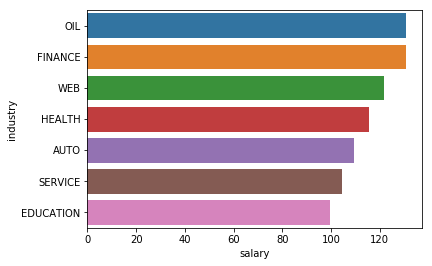

In [27]:
sns.barplot( y =industry.index, x =   industry['salary'])

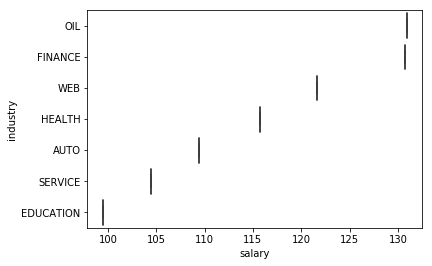

In [28]:
sns.boxplot(y = industry.index, x = industry['salary'])

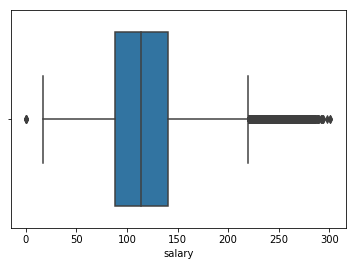

In [29]:
sns.boxplot(x = df_train['salary'])

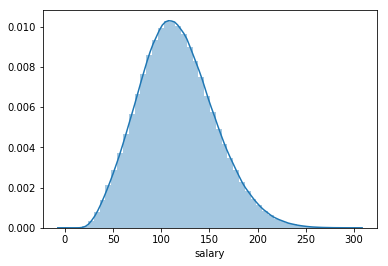

In [30]:
sns.distplot(df_train['salary'])

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [58]:
df_train.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


In [70]:
df_train.describe(include = 'all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685061665,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


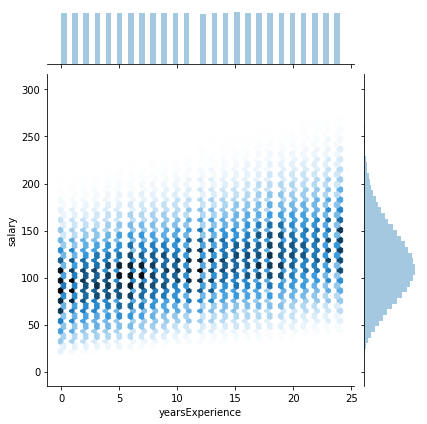

In [73]:
sns.jointplot(x = df_train['yearsExperience'],y = df_train['salary'], kind = 'hex')

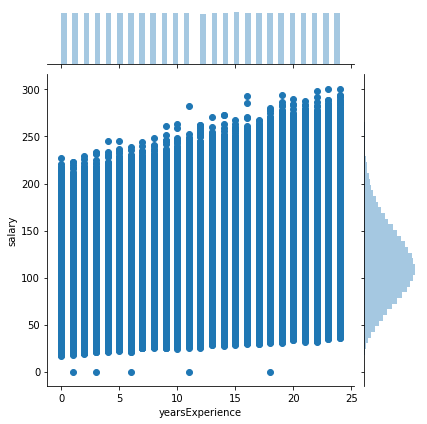

In [75]:
sns.jointplot(x = df_train['yearsExperience'],y = df_train['salary'])

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [18]:
df_dummy = df_train.copy()

In [21]:
df_train['salary'].mean()

116.061818

In [22]:
df_dummy['salary'] = 116

In [23]:
mean_squared_error(df_dummy['salary'], df_train['salary'])

1499.08092

In [6]:
df_train.groupby('industry').mean()

,yearsExperience,milesFromMetropolis,salary
industry,,,
AUTO,11.974668,49.553521,109.433690
EDUCATION,12.000105,49.586442,99.448386
FINANCE,12.009715,49.532635,130.746743
HEALTH,11.972856,49.501061,115.735540
OIL,12.006486,49.490303,130.952946
SERVICE,11.994665,49.577878,104.446820
WEB,11.988227,49.463172,121.644512


In [36]:
df_train.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

1. linear regression (salary can be a linear relationship )
    1. stepwise
    2. lasso
    3. ridge
2. random forest
    1. xgboost
3. svm
4. one hot encoding for jobtype, major, degree, industry


Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [32]:
df_train.groupby('degree').mean()

,yearsExperience,milesFromMetropolis,salary
degree,,,
BACHELORS,11.986045,49.589646,125.454663
DOCTORAL,12.003307,49.608529,135.489433
HIGH_SCHOOL,11.995493,49.459355,101.920654
MASTERS,11.984935,49.553947,130.504903
NONE,11.991404,49.477497,98.176467


In [31]:
df_train.groupby('jobType').mean()

,yearsExperience,milesFromMetropolis,salary
jobType,,,
CEO,11.998269,49.478458,145.311425
CFO,11.990440,49.572715,135.458547
CTO,12.010812,49.580930,135.479983
JANITOR,11.969657,49.443815,70.813045
JUNIOR,11.992287,49.659968,95.331557
MANAGER,11.987332,49.498006,115.367596
SENIOR,11.996624,49.572558,105.487775
VICE_PRESIDENT,11.993628,49.428059,125.367629


In [46]:


#categorical_columns = ['jobType','degree', 'major', 'industry']
categorical_columns = ['jobType',
                       #'degree',
                       'major',
                       'industry']

numerical_columns = ['yearsExperience', 'milesFromMetropolis']
jobType =  ['jobType']
degree = ['degree']
major = ['major']
industry = ['industry']


categorical_pipe =  make_pipeline(
    OneHotEncoder()
)

jobType_pipe = make_pipeline(
    OrdinalEncoder(categories =[['JANITOR', 'JUNIOR','SENIOR','MANAGER','VICE_PRESIDENT','CFO','CTO','CEO']])
)


degree_pipe = make_pipeline(
    OrdinalEncoder(categories =[['NONE', 'HIGH_SCHOOL','BACHELORS','MASTERS','DOCTORAL']])

) 



numerical_pipe = make_pipeline(
    StandardScaler()
)

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('deg', degree_pipe, degree),
         # ('job', jobType_pipe, jobType),

     ('num', numerical_pipe, numerical_columns)]
)


In [38]:
df_train_features[categorical_columns]

,jobType,major,industry
0,CFO,MATH,HEALTH
1,CEO,NONE,WEB
2,VICE_PRESIDENT,PHYSICS,HEALTH
3,MANAGER,CHEMISTRY,AUTO
4,VICE_PRESIDENT,PHYSICS,FINANCE
...,...,...,...
999995,VICE_PRESIDENT,CHEMISTRY,HEALTH
999996,CTO,NONE,FINANCE
999997,JUNIOR,NONE,EDUCATION
999998,CFO,NONE,HEALTH


## Random Forest

In [ ]:

rf = Pipeline([
    ('preprocess', preprocessing),
    ('rfregressor', RandomForestRegressor(max_depth = 5, n_jobs = -1))
])


In [39]:
rf.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=True))],
                                            

In [40]:
rf.score(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

0.5339546808188526

In [20]:
mean_squared_error(rf.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

468.35350224444215

## Linear Regression

In [44]:

lr = Pipeline(steps = [
     ('preprocess', preprocessing),
    ('lregressor', LinearRegression())])
lr.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=True))],
                                            

In [45]:
mean_squared_error(lr.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

394.3695108594638

In [56]:
lr.named_steps['lregressor'].coef_


array([[ 28.63226445,  18.82930398,  18.84416284, -33.7260946 ,
        -21.16306723,  -1.23482586, -11.15348975,   8.6865952 ,
          1.561682  ,  11.59192871,  -4.1566996 ,   6.55913854,
         -7.84120062,  -1.62237329,   6.07649785,  -0.5420161 ,
          2.41837753,   8.98163678,  -5.24284343,   3.5199554 ,
         -6.57823374,   0.70384803,  -5.44642825, -15.4365194 ,
         15.69637805,   0.80083304,  15.86331951, -10.42679192,
          6.664058  ,  14.49763243, -11.53691507]])

## Lasso

In [54]:
lasso = Pipeline([
    ('preprocess', preprocessing),
    ('lassoreg', Lasso())
])
lasso.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=True))],
                                            

In [55]:
mean_squared_error(lasso.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

491.269447223051

## Ridge

In [56]:
ridge = Pipeline([
    ('preprocess', preprocessing),
    ('ridgereg', Ridge())
])
ridge.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=True))],
                                            

In [57]:
mean_squared_error(ridge.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

384.56041812207377

### ---- 8 Create models ----

## TPOT

In [11]:
preprocessing.fit(df_train_features)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 Pipeline(memory=None,
                                          steps=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True))],
                                          verbose=False),
                                 ['jobType', 'degree', 'major', 'industry']),
                                ('num',
                                 Pipeline(memory=None,
                                          steps=[('standardscaler',
   

In [83]:
new_data = preprocessing.transform(df_train_features)

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [18]:
df_train_salaries.iloc[:,1]

0         130
1         101
2         137
3         142
4         163
         ... 
999995     88
999996    160
999997     64
999998    149
999999     88
Name: salary, Length: 999995, dtype: int64

In [ ]:
#tpot

In [21]:
df_train_features.iloc[:,2:]

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,CFO,MASTERS,MATH,HEALTH,10,83
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,CFO,MASTERS,NONE,HEALTH,6,5


In [30]:
np.asarray(df_train_features.iloc[:,2:])

array([['CFO', 'MASTERS', 'MATH', 'HEALTH', 10, 83],
       ['CEO', 'HIGH_SCHOOL', 'NONE', 'WEB', 3, 73],
       ['VICE_PRESIDENT', 'DOCTORAL', 'PHYSICS', 'HEALTH', 10, 38],
       ...,
       ['JUNIOR', 'HIGH_SCHOOL', 'NONE', 'EDUCATION', 16, 81],
       ['CFO', 'MASTERS', 'NONE', 'HEALTH', 6, 5],
       ['JUNIOR', 'BACHELORS', 'NONE', 'EDUCATION', 20, 11]], dtype=object)

In [27]:
np.asarray(df_train_salaries.iloc[:,1])

array([130, 101, 137, ...,  64, 149,  88])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                    np.asarray(df_train_salaries.iloc[:,1]),
                                                    train_size=0.75, test_size=0.25, random_state=42)
  
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, random_state=42, max_eval_time_mins = 2, 
                     n_jobs = -1,
                     periodic_checkpoint_folder = "tpot_salary1.txt",
                     config_dict = 'TPOT sparse'
                    )
tpot.fit(X_train, y_train) 
print(tpot.score(X_test, y_test))
tpot.export('tpot_salary_pipeline.py') 


11 operators have been imported by TPOT.


Skipped pipeline #5 due to time out. Continuing to the next pipeline.
Skipped pipeline #16 due to time out. Continuing to the next pipeline.
Skipped pipeline #19 due to time out. Continuing to the next pipeline.
Skipped pipeline #21 due to time out. Continuing to the next pipeline.
Skipped pipeline #24 due to time out. Continuing to the next pipeline.
Skipped pipeline #35 due to time out. Continuing to the next pipeline.
Skipped pipeline #38 due to time out. Continuing to the next pipeline.
Skipped pipeline #40 due to time out. Continuing to the next pipeline.
Skipped pipeline #46 due to time out. Continuing to the next pipeline.
Created new folder to save periodic pipeline: tpot_salary1.txt
Saving periodic pipeline from pareto front to tpot_salary1.txt/pipeline_gen_1_idx_0_2020.01.03_03-47-21.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array..
_pre_test decorator: _random_mutation_operator: num_test=1 A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy a

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [ ]:
scores_rf = cross_validate(rf,df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:], cv = 5,
                       scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score = True)

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [49]:
scores_linreg = cross_validate(lr,df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:], cv = 5,
                       scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score = True)

In [50]:
scores

{'fit_time': array([2.25949144, 2.20079398, 2.37065482, 2.30806112, 2.27097845]),
 'score_time': array([0.27930903, 0.17788291, 0.18712091, 0.18037295, 0.20594144]),
 'test_r2': array([0.73634862, 0.73709632, 0.7364397 , 0.73726402, 0.73732647]),
 'train_r2': array([0.73705317, 0.73686594, 0.7370286 , 0.73682495, 0.73680733]),
 'test_neg_mean_squared_error': array([-396.19269399, -394.93251359, -396.06945896, -392.58949117,
        -392.20185563]),
 'train_neg_mean_squared_error': array([-393.91836445, -394.23260406, -393.95011217, -394.81812134,
        -394.91755534])}

In [65]:
params = {'lassoreg__alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,5,10,20]}

In [66]:
lasso_search =  GridSearchCV(lasso, params,scoring = 'neg_mean_squared_error', cv = 5)

In [67]:
lasso_search.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153628515.94249752, tolerance: 119846.70566935066
  max_iter, tol, rng, random, positive)
/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153732259.40295038, tolerance: 119856.96931300739
  max_iter, tol, rng, random, positive)
/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153653111.27323702, tolerance: 119845.16673018859
  max_iter, tol, rng, random, positive)
/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:460: 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehotencoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                  

In [69]:
print(lasso_search.best_params_)
print(lasso_search.best_score_)

{'lassoreg__alpha': 1e-08}
-384.5913347813538


In [70]:
mean_squared_error(lasso_search.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

384.56006672115274

In [71]:
params = {'ridgereg__alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,5,10,20]}

In [74]:
ridge_search =  GridSearchCV(ridge, params,scoring = 'neg_mean_squared_error', cv = 5)

In [75]:
ridge_search.fit(df_train_features.iloc[:,2:],df_train_salaries.iloc[:,1:])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehotencoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                  

In [77]:
print(ridge_search.best_params_)
print(ridge_search.best_score_)

{'ridgereg__alpha': 5}
-384.5917149495308


In [89]:
mean_squared_error(ridge_search.predict(df_train_features.iloc[:,2:]),df_train_salaries.iloc[:,1:])

384.5604190081154

In [87]:

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(new_data,df_train_salaries.iloc[:,1:])


[13:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [88]:
mean_squared_error(xgb_reg.predict(new_data),df_train_salaries.iloc[:,1:])

373.13630518747345

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data